In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from collections import Counter


----

# training data

## Overview

In [11]:
df_train = pd.read_csv("../data/raw/train.csv")

In [12]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [13]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [14]:
df_train.shape

(188533, 13)

The training data contains 188533 rows and 13 columns

In [15]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [16]:
category_features = ['brand', 'model', 'fuel_type', 'engine','transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

In [17]:
numerical_features = ['milage','price', 'model_year',]

---

In [18]:
# helper function

def show_statistic_details(df: pd.DataFrame, col_name: str): 
    mean = df.groupby(col_name)['price'].mean()
    std = df.groupby(col_name)['price'].std()
    counts = df.groupby(col_name).size().sort_values(ascending=False)
    
    # Sort the items by mean
    sorted_mean = mean.sort_values(ascending=False)

    # Print the sorted results
    for item in sorted_mean.index:
        item_mean = mean[item]
        item_std = std[item]
        item_counts = counts[item]
        percentage_std = (item_std / item_mean) * 100 if item_mean != 0 else 0
        print(f"{item}: Mean = {item_mean:.2f}, Std Dev = {item_std:.2f} ({percentage_std:.2f}%) ({item_counts})")
    

In [109]:
def remove_outliers_iqr(df: pd.DataFrame, column):   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Features

## car brand

In [36]:
brand_counts = df_train.groupby('brand').size().sort_values(ascending=False)

In [37]:
print(f"totally {len(brand_counts)} brands are included")

totally 57 brands are included


In [38]:
brand_counts/len(df_train)*100
# Cars in this dataset are mostly "Ford" (12%)

brand
Ford             12.246132
Mercedes-Benz    10.169042
BMW               9.031841
Chevrolet         8.664266
Audi              5.774586
Porsche           5.628723
Land              5.052166
Toyota            4.694138
Lexus             4.584343
Jeep              3.433882
Cadillac          2.479142
RAM               2.253717
Nissan            2.084516
Tesla             1.982677
INFINITI          1.737627
GMC               1.705272
Dodge             1.661778
Mazda             1.442188
Kia               1.324437
Lincoln           1.285186
Subaru            1.262909
Acura             1.210398
Honda             1.114394
Hyundai           1.084691
Volkswagen        0.936176
Jaguar            0.699612
Bentley           0.612625
MINI              0.564357
Genesis           0.513968
Buick             0.498586
Maserati          0.498056
Lamborghini       0.429103
Chrysler          0.385609
Volvo             0.383487
Alfa              0.361740
Rivian            0.312943
Rolls-Royce       0.29

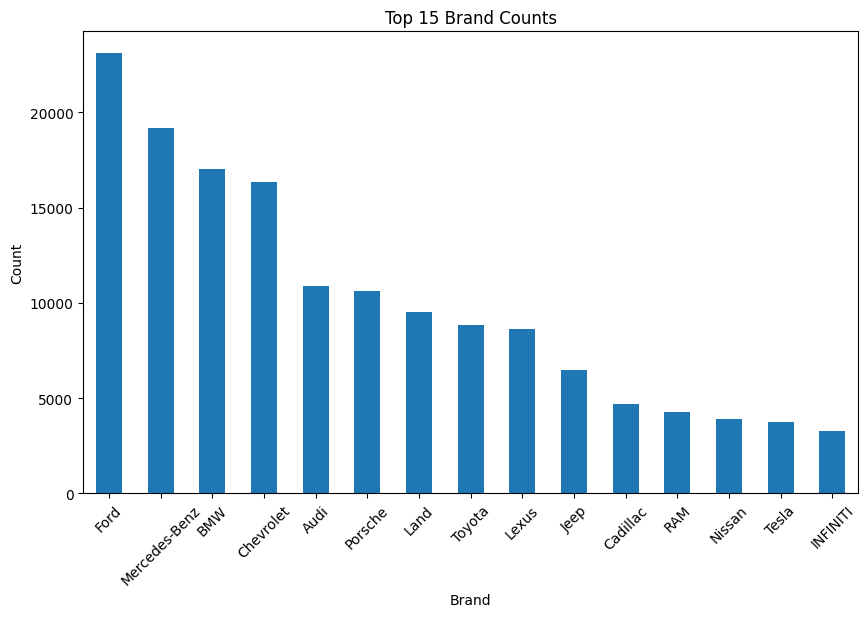

In [39]:
# Plot the first 15 brands
top_15_brands = brand_counts.head(15)
top_15_brands.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 15 Brand Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

In [40]:
show_statistic_details(df_train, "brand")
# 布加迪（法语：Bugatti），是法国一家超级跑车车厂，曾生产出世界上最快车，最原始的布加迪品牌已经在二战后消失，不过战后此品牌曾经有两度复兴，曾经是大众集团旗下的一个全资品牌，2021年与瑞马克汽车的跑车部门合并。

Bugatti: Mean = 169600.00, Std Dev = 82980.48 (48.93%) (7)
Lamborghini: Mean = 159176.01, Std Dev = 179716.86 (112.90%) (809)
Rolls-Royce: Mean = 135488.65, Std Dev = 178508.97 (131.75%) (561)
Bentley: Mean = 129272.93, Std Dev = 221562.66 (171.39%) (1155)
McLaren: Mean = 123261.24, Std Dev = 98033.99 (79.53%) (243)
Ferrari: Mean = 116751.01, Std Dev = 134929.62 (115.57%) (359)
Aston: Mean = 112364.59, Std Dev = 213527.99 (190.03%) (238)
Rivian: Mean = 81089.15, Std Dev = 57988.87 (71.51%) (590)
Porsche: Mean = 70899.95, Std Dev = 112993.04 (159.37%) (10612)
Lucid: Mean = 63310.36, Std Dev = 39558.84 (62.48%) (69)
Maserati: Mean = 61459.70, Std Dev = 67078.34 (109.14%) (939)
Tesla: Mean = 56445.27, Std Dev = 68630.09 (121.59%) (3738)
Maybach: Mean = 53566.33, Std Dev = 37370.60 (69.77%) (3)
Genesis: Mean = 53556.33, Std Dev = 74395.82 (138.91%) (969)
Land: Mean = 53204.88, Std Dev = 92001.94 (172.92%) (9525)
Alfa: Mean = 51993.10, Std Dev = 50643.53 (97.40%) (682)
RAM: Mean = 51290.73,

## model

In [41]:
model_counts = df_train.groupby('model').size().sort_values(ascending=False)
len(model_counts)

1897

In [42]:
model_counts/len(df_train)*100

model
F-150 XLT                        1.562061
M3 Base                          1.182286
Camaro 2SS                       0.906473
M4 Base                          0.860327
Mustang GT Premium               0.809407
                                   ...   
XLR V                            0.001061
X5 3.0i                          0.000530
Integra w/A-Spec Tech Package    0.000530
X5 xDrive40e                     0.000530
XLR Base                         0.000530
Length: 1897, dtype: float64

In [43]:
model_counts.index[0]

'F-150 XLT'

In [44]:
set(df_train.loc[df_train['model'] == model_counts.index[0], 'brand'].to_list())

{'Ford', 'Jaguar', 'Lexus', 'Mercury', 'Toyota'}

In [45]:
set(df_train.loc[df_train['model'] == model_counts.index[1], 'brand'].to_list())

{'Audi', 'BMW', 'Dodge', 'Ford', 'Mercedes-Benz', 'Nissan', 'Porsche', 'Tesla'}

It seems that a model can correspond to multiple brand

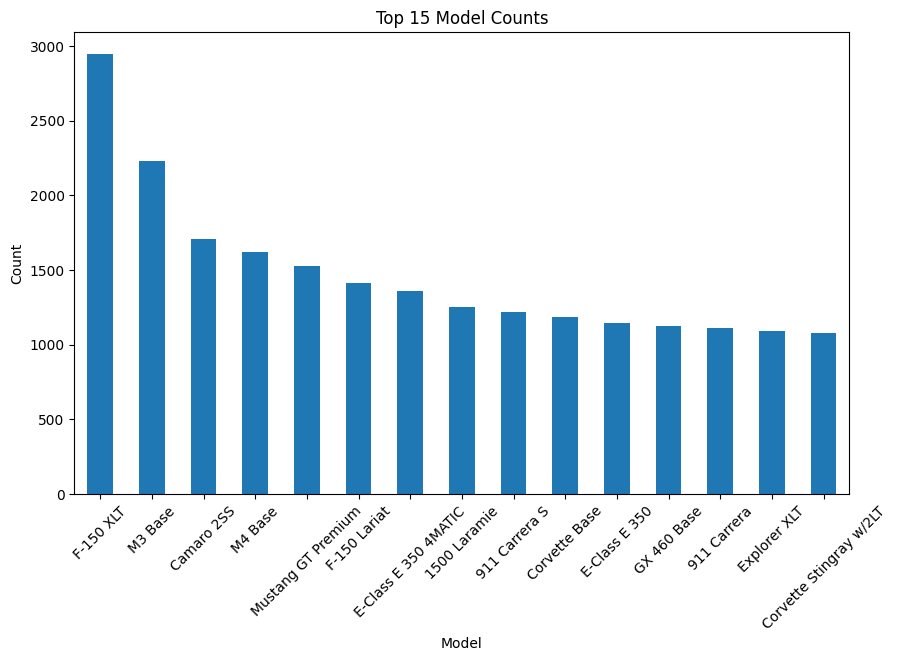

In [46]:
# Plot the first 15 brands
top_15_models = model_counts.head(15)
top_15_models.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 15 Model Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

In [47]:
df_train.groupby('model')['price'].mean().sort_values(ascending=False)

model
Carrera GT Base                    356937.250000
Gallardo SE                        265551.272727
Phantom Drophead Coupe Drophead    250358.269231
Continental GT GT Speed            244661.833333
Martin DB7 Vantage Volante         229714.312500
                                       ...      
Ram Van 1500                         8693.772727
Eurovan MV                           8245.571429
Yaris L                              8215.625000
Matrix XR                            7688.000000
Integra LS                           7683.117647
Name: price, Length: 1897, dtype: float64

In [48]:
show_statistic_details(df_train, "model")

Carrera GT Base: Mean = 356937.25, Std Dev = 550957.55 (154.36%) (8)
Gallardo SE: Mean = 265551.27, Std Dev = 351859.46 (132.50%) (22)
Phantom Drophead Coupe Drophead: Mean = 250358.27, Std Dev = 205407.18 (82.05%) (26)
Continental GT GT Speed: Mean = 244661.83, Std Dev = 440351.65 (179.98%) (18)
Martin DB7 Vantage Volante: Mean = 229714.31, Std Dev = 727232.91 (316.58%) (16)
Bentayga Speed: Mean = 220777.55, Std Dev = 216988.10 (98.28%) (76)
Rover LR4 Lux: Mean = 215266.13, Std Dev = 757751.21 (352.01%) (15)
Huracan EVO Coupe: Mean = 211282.96, Std Dev = 162250.80 (76.79%) (26)
Flying Spur V8: Mean = 211032.00, Std Dev = 162184.03 (76.85%) (28)
911 R: Mean = 206067.46, Std Dev = 400728.52 (194.46%) (63)
Phantom: Mean = 202962.03, Std Dev = 210653.98 (103.79%) (29)
Huracan Tecnica Coupe: Mean = 192124.62, Std Dev = 116944.88 (60.87%) (29)
Aventador LP750-4 Superveloce: Mean = 189270.73, Std Dev = 340208.27 (179.75%) (22)
812 Superfast Base: Mean = 188882.50, Std Dev = 153108.25 (81.06%

## model_year

In [49]:
year_counts = df_train.groupby('model_year').size().sort_values(ascending=False)

In [50]:
year_counts

model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
2013     6796
2011     6265
2012     6095
2008     5156
2007     4876
2010     4235
2005     3129
2006     2814
2009     2716
2004     2570
2003     1906
2001     1534
2002     1282
2000      558
1999      554
1998      343
1997      312
1996      189
2024      162
1993      140
1995      102
1994       92
1992       14
1974       12
dtype: int64

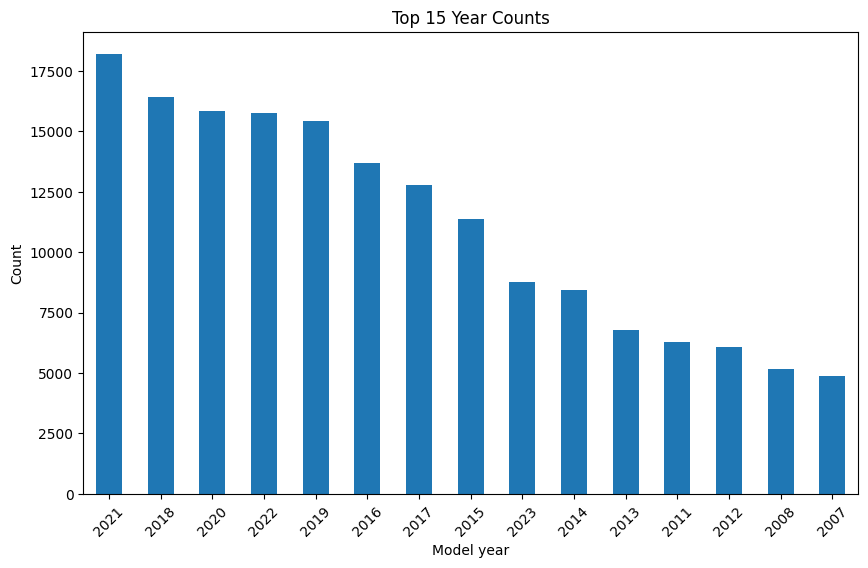

In [51]:
# Plot the first 15 brands
top_15_years = year_counts.head(15)
top_15_years.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Model year')
plt.ylabel('Count')
plt.title('Top 15 Year Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

In [52]:
sorted(Counter(df_train['model_year'].to_list()).items(),  key=lambda x: x[1], reverse=True) 

[(2021, 18198),
 (2018, 16414),
 (2020, 15848),
 (2022, 15749),
 (2019, 15409),
 (2016, 13696),
 (2017, 12794),
 (2015, 11389),
 (2023, 8769),
 (2014, 8415),
 (2013, 6796),
 (2011, 6265),
 (2012, 6095),
 (2008, 5156),
 (2007, 4876),
 (2010, 4235),
 (2005, 3129),
 (2006, 2814),
 (2009, 2716),
 (2004, 2570),
 (2003, 1906),
 (2001, 1534),
 (2002, 1282),
 (2000, 558),
 (1999, 554),
 (1998, 343),
 (1997, 312),
 (1996, 189),
 (2024, 162),
 (1993, 140),
 (1995, 102),
 (1994, 92),
 (1992, 14),
 (1974, 12)]

Text(0.5, 1.0, 'Year Distribution')

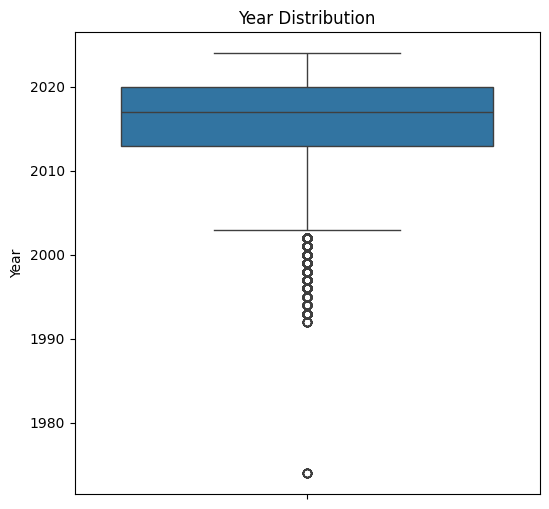

In [53]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='model_year', data=df_train)
plt.ylabel('Year')
plt.title('Year Distribution')

# The year of the cars are mostly between 2010-1020

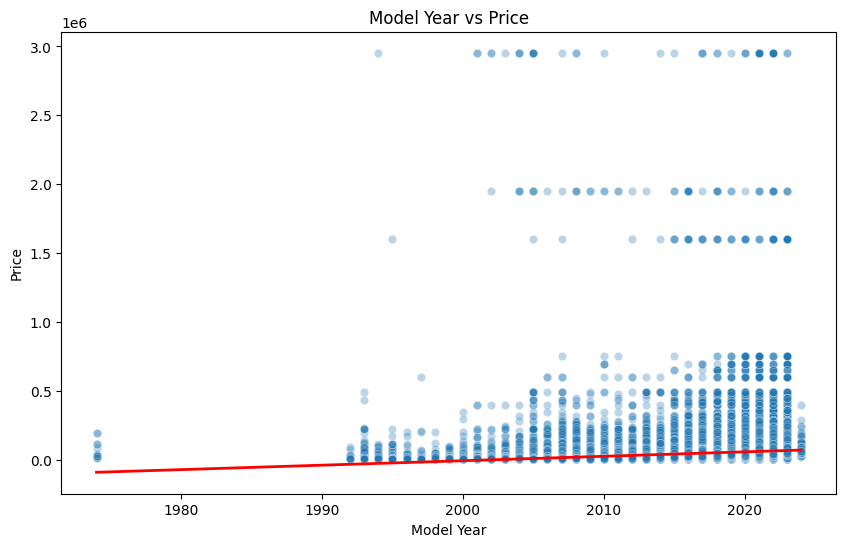

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df_train, alpha=0.3)
sns.regplot(x='model_year', y='price', data=df_train, scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Model Year vs Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

In [55]:
show_statistic_details(df_train, "model_year")

2023: Mean = 95707.91, Std Dev = 106759.67 (111.55%) (8769)
2024: Mean = 78006.07, Std Dev = 47818.26 (61.30%) (162)
1974: Mean = 74124.08, Std Dev = 68266.67 (92.10%) (12)
2022: Mean = 72732.33, Std Dev = 103101.21 (141.75%) (15749)
2021: Mean = 65893.86, Std Dev = 93183.06 (141.41%) (18198)
2020: Mean = 61556.78, Std Dev = 76525.25 (124.32%) (15848)
1994: Mean = 50181.76, Std Dev = 306852.62 (611.48%) (92)
2019: Mean = 49375.30, Std Dev = 58607.32 (118.70%) (15409)
2018: Mean = 47707.57, Std Dev = 65528.11 (137.35%) (16414)
1995: Mean = 38205.87, Std Dev = 160124.76 (419.11%) (102)
1993: Mean = 38091.87, Std Dev = 70700.60 (185.61%) (140)
2017: Mean = 37943.23, Std Dev = 65091.68 (171.55%) (12794)
2016: Mean = 33531.82, Std Dev = 59449.53 (177.29%) (13696)
2015: Mean = 30974.88, Std Dev = 55549.59 (179.34%) (11389)
1992: Mean = 26957.00, Std Dev = 27142.23 (100.69%) (14)
2005: Mean = 26376.85, Std Dev = 149048.06 (565.07%) (3129)
2014: Mean = 24758.27, Std Dev = 43692.70 (176.48%) (8

## Milage

In [112]:
df_train_no_outliers = remove_outliers_iqr(df_train, 'milage')

In [114]:
milage_counts = df_train_no_outliers.groupby('milage').size().sort_values(ascending=False)

<Axes: ylabel='milage'>

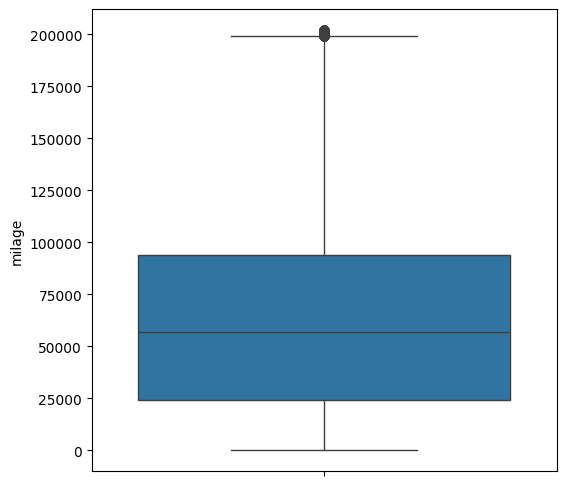

In [115]:
# Create a box plot to show the distribution of prices without grouping
plt.figure(figsize=(6, 6))
sns.boxplot(y='milage', data=df_train_no_outliers)
# the milage is mostly raging in 30000~100000

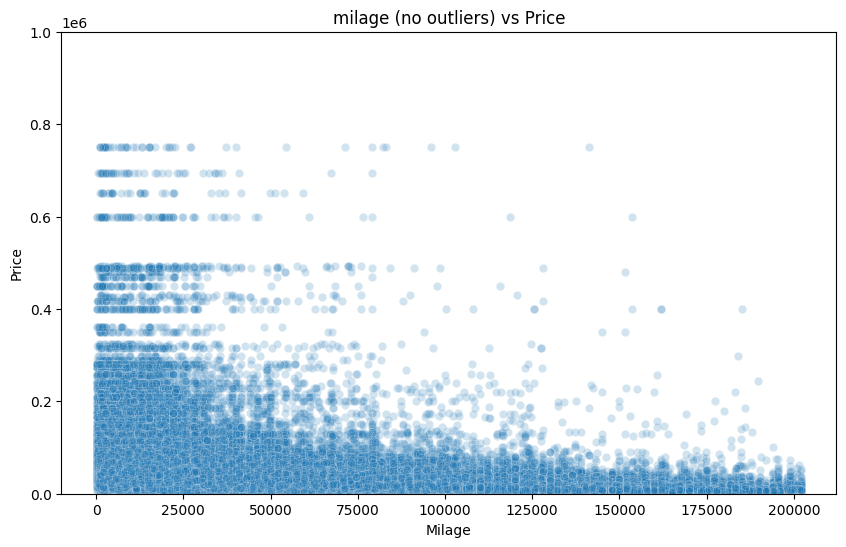

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', data=df_train_no_outliers,alpha=0.2)
plt.title('milage (no outliers) vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.ylim([0, 10e+5])
plt.show()

# Some 

In [145]:
df_train2 = df_train.copy()
df_train2['reverse_milage'] = 1 / df_train2['milage'] 

In [146]:
df_train2['reverse_milage'] 

0         0.000005
1         0.000007
2         0.000007
3         0.000051
4         0.000135
            ...   
188528    0.000020
188529    0.000035
188530    0.000073
188531    0.000072
188532    0.000017
Name: reverse_milage, Length: 188533, dtype: float64

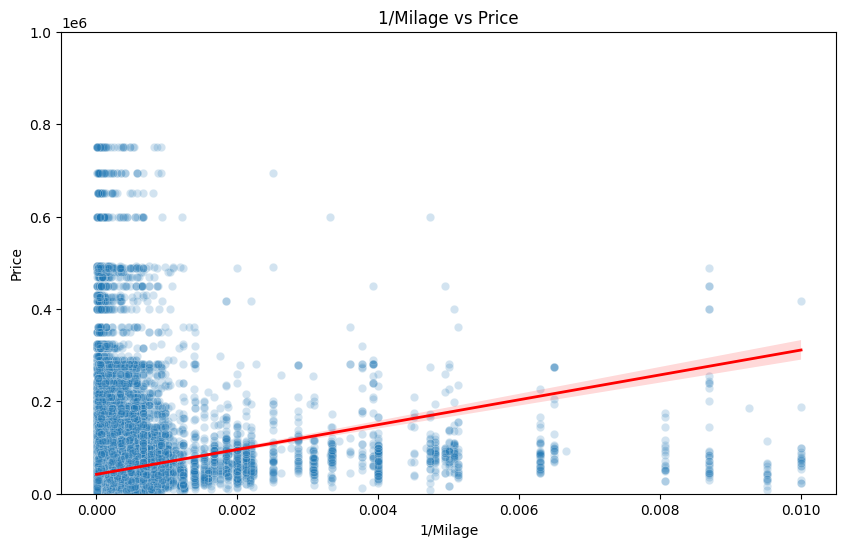

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reverse_milage', y='price', data=df_train2, alpha=0.2)
sns.regplot(x='reverse_milage', y='price', data=df_train2, scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('1/Milage vs Price')
plt.xlabel('1/Milage')
plt.ylabel('Price')
plt.ylim([0, 10e+5])

plt.show()
# Some 

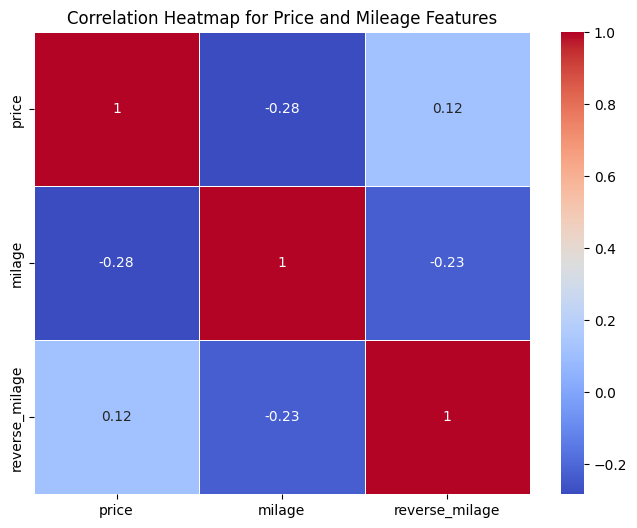

In [151]:
corr_matrix = df_train2[['price', 'milage', 'reverse_milage']].corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Price and Mileage Features')
plt.show()
# Use the original feature might increase the performance

## fuel_type

In [61]:
set(df_train['fuel_type'].to_list())

{'Diesel',
 'E85 Flex Fuel',
 'Gasoline',
 'Hybrid',
 'Plug-In Hybrid',
 nan,
 'not supported',
 '–'}

In [62]:
df_train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [110]:
fuel_type_counts = df_train.groupby('fuel_type').size().sort_values(ascending=False)
fuel_type_counts

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
dtype: int64

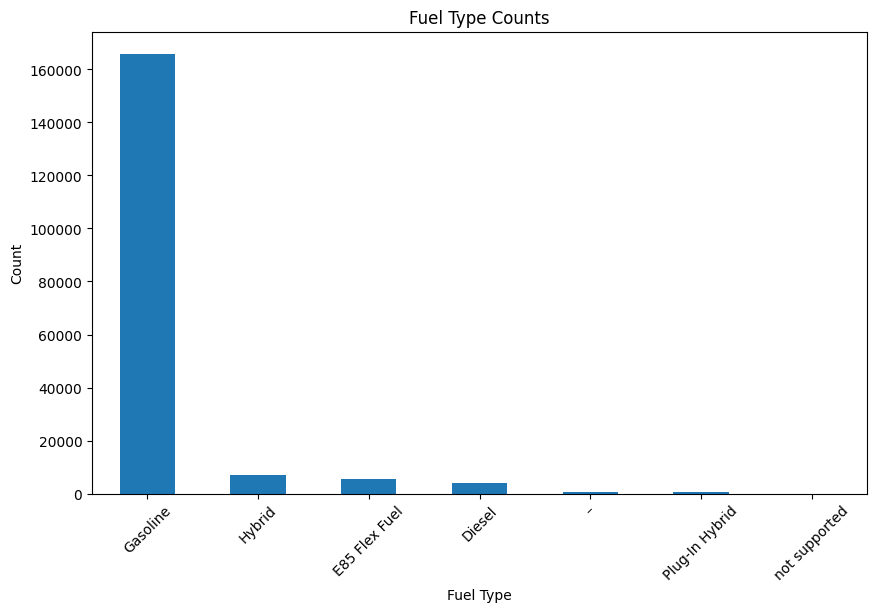

In [64]:
# Plot the first 15 brands
fuel_type_counts.plot(kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Counts')
plt.xticks(rotation=45)
# Show plot
plt.show()

- **Gasoline**
- **Hybrid**
- **E85 Flex Fuel**:  ethanol fuel blend containing up to 85% ethanol and 15% gasoline.
- **Diesel**: common in trucks and heavy-duty vehicles 
- **Plug-In Hybrid** :use both a gasoline engine and a rechargeable electric battery

In [65]:
df_train_2 = df_train.copy()
df_train_2['fuel_type'] = df_train_2['fuel_type'].replace('–', np.nan)
df_train_2['fuel_type'] = df_train_2['fuel_type'].replace('not supported', np.nan)



In [66]:
fuel_type_counts = df_train_2.groupby('fuel_type').size().sort_values(ascending=False)
fuel_type_counts

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
Plug-In Hybrid       521
dtype: int64

In [67]:
show_statistic_details(df_train_2, "fuel_type")

# Hybrid is most expensive
# Diesel is secondly expensive but may becuz they are heavy
# E85 Flex Fuel cars tend to be cheaper

Hybrid: Mean = 55473.45, Std Dev = 57999.20 (104.55%) (6832)
Diesel: Mean = 48769.59, Std Dev = 93900.22 (192.54%) (3955)
Plug-In Hybrid: Mean = 44150.97, Std Dev = 29218.46 (66.18%) (521)
Gasoline: Mean = 43360.01, Std Dev = 79805.75 (184.05%) (165940)
E85 Flex Fuel: Mean = 26729.76, Std Dev = 54669.86 (204.53%) (5406)


## engine

In [68]:
len(set(df_train['engine'].to_list()))
# around 1117 type of engines included

1117

In [69]:
set(df_train['engine'].to_list())

{'275.0HP 2.7L Flat 6 Cylinder Engine Gasoline Fuel',
 '355.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '3.0L V6 24V GDI DOHC Turbo',
 '192.0HP 2.3L 4 Cylinder Engine Gasoline Fuel',
 '275.0HP 4.6L 8 Cylinder Engine Gasoline Fuel',
 '350.0HP 5.7L 8 Cylinder Engine Gasoline Fuel',
 '246.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '206.0HP 2.4L 4 Cylinder Engine Gasoline Fuel',
 '169.0HP 2.5L 4 Cylinder Engine Gasoline Fuel',
 '275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel',
 '277.0HP 3.0L Straight 6 Cylinder Engine Diesel Fuel',
 '315.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
 '300.0HP 6.0L 8 Cylinder Engine Gasoline Fuel',
 '272.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
 '147.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '3.6L V6 24V MPFI DOHC',
 '3.8L V6 24V MPFI DOHC Twin Turbo',
 '355.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel',
 '300.0HP 2.5L 4 Cylinder Engine Gasoline Fuel',
 '2.7L I4 16V GDI DOHC Turbo',
 '355.0HP 6.0L 8 Cylinder Engine Gasoline Fuel',
 '261.0HP 2.0L 

which, i can break down into the following information

- Horsepower (HP): Extract the horsepower information.
- Engine Displacement (L): Extract the engine displacement (in liters).
- Cylinder Count: Extract the number of cylinders.
- Fuel Type: Categorize the fuel type (e.g., Gasoline, Diesel, Hybrid, etc.).


for example, `201.0HP 1.6L 4 Cylinder Engine Gasoline Fuel` means: 
- Horsepower: `201.0HP`
- Engine Displacement: `1.6L` Higher engine displacement (measured in liters) usually indicates a more powerful engine, which can lead to higher vehicle prices.
- Cylinder Count: `4` Engines with more cylinders (e.g., V8, V12) typically cost more than smaller configurations (e.g., I4, V6).
- Fuel Type: `Gasoline` <- which is not necessary here since it has been declared in anther feature.

others like: 
engine = `3.8L V6 24V GDI DOHC`
- Fuel Injection: `GDI`  Advanced fuel injection technologies like GDI (Gasoline Direct Injection) or Turbocharged Direct Injection can increase the price.
- Camshaft Configuration: `DOHC` Engine camshaft configurations like DOHC (Dual Overhead Camshaft) or SOHC (Single Overhead Camshaft) affect performance, efficiency, and cost.
- Valve Count: `24` Higher valve counts (e.g., 24V, 32V) are associated with improved air intake and exhaust efficiency, enhancing engine performance.

In [70]:
# Extract the engines corresponding to fuel type= 
set(df_train.loc[ df_train['fuel_type'] == "Gasoline", 'engine'].to_list())


{'275.0HP 2.7L Flat 6 Cylinder Engine Gasoline Fuel',
 '355.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '3.0L V6 24V GDI DOHC Turbo',
 '192.0HP 2.3L 4 Cylinder Engine Gasoline Fuel',
 '275.0HP 4.6L 8 Cylinder Engine Gasoline Fuel',
 '350.0HP 5.7L 8 Cylinder Engine Gasoline Fuel',
 '246.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '206.0HP 2.4L 4 Cylinder Engine Gasoline Fuel',
 '169.0HP 2.5L 4 Cylinder Engine Gasoline Fuel',
 '275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel',
 '300.0HP 6.0L 8 Cylinder Engine Gasoline Fuel',
 '315.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
 '272.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
 '277.0HP 3.0L Straight 6 Cylinder Engine Diesel Fuel',
 '147.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '3.6L V6 24V MPFI DOHC',
 '3.8L V6 24V MPFI DOHC Twin Turbo',
 '355.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel',
 '300.0HP 2.5L 4 Cylinder Engine Gasoline Fuel',
 '2.7L I4 16V GDI DOHC Turbo',
 '355.0HP 6.0L 8 Cylinder Engine Gasoline Fuel',
 '261.0HP 2.0L 

In [71]:
df_train.loc[df_train['engine'] == "3.8L V6 24V GDI DOHC", :]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
228,228,Kia,Telluride SX,2020,26870,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Glacial White Pearl,Black,None reported,NaN,37698
1250,1250,Kia,Telluride SX,2021,24423,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Midnight Black,Black,None reported,NaN,44340
2500,2500,Kia,Telluride EX,2022,38612,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Iridium Metallic,Black,None reported,Yes,43860
2954,2954,Kia,Telluride SX,2022,9822,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Midnight Black,Black,None reported,NaN,41598
4226,4226,Kia,Telluride SX,2020,36311,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Red,Black,None reported,Yes,47124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184034,184034,Kia,Telluride SX,2022,1750,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Glacial White Pearl,Black,None reported,NaN,84620
187436,187436,Kia,Telluride SX,2022,13275,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Sangria Red,Black,None reported,Yes,35645
187936,187936,Kia,Telluride SX,2021,11111,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Gray,Black,None reported,NaN,65998
188377,188377,Kia,Telluride SX,2019,10483,Gasoline,3.8L V6 24V GDI DOHC,4-Speed Automatic,Lunar Silver Metallic,Black,None reported,NaN,44998


In [72]:
set(df_train.loc[ df_train['fuel_type'] == "Hybrid", 'engine'].to_list())

{'1.6L I4 16V GDI DOHC Hybrid',
 '1.6L I4 16V GDI DOHC Turbo Hybrid',
 '120 AH',
 '121.0HP 1.8L 4 Cylinder Engine Gas/Electric Hybrid',
 '134.0HP 1.8L 4 Cylinder Engine Gas/Electric Hybrid',
 '134.0HP 1.8L 4 Cylinder Engine Plug-In Electric/Gas',
 '139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid',
 '147.0HP 2.4L 4 Cylinder Engine Gas/Electric Hybrid',
 '150.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
 '151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid',
 '151.0HP Electric Motor Hydrogen Fuel',
 '156.0HP 2.5L 4 Cylinder Engine Gas/Electric Hybrid',
 '170.0HP 0.65L Electric Motor Electric Fuel System',
 '172.0HP 2.4L 4 Cylinder Engine Gas/Electric Hybrid',
 '182.0HP 2.4L 4 Cylinder Engine Gasoline/Mild Electric Hybrid',
 '185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel',
 '188.0HP 2.0L 4 Cylinder Engine Gas/Electric Hybrid',
 '188.0HP 3.0L V6 Cylinder Engine Diesel Fuel',
 '191.0HP 2.5L 4 Cylinder Engine Gas/Electric Hybrid',
 '192.0HP 2.0L 4 Cylinder Engine Gas/Electric Hybrid',
 '199.0

### `fuel_injection`: Fuel Injection 

In [73]:
# Function to extract fuel injection type
def extract_fuel_injection(engine):
    if 'GDI' in engine:
        return 'GDI'
    elif 'MPFI' in engine:
        return 'MPFI'  # Multi-Point Fuel Injection
    elif 'SFI' in engine:
        return 'SFI'  # Sequential Fuel Injection
    else:
        return 'Unknown'

In [74]:
df_train['fuel_injection'] = df_train['engine'].apply(extract_fuel_injection)

In [75]:
fuel_injection = df_train['fuel_injection'].to_list()
Counter(fuel_injection)

Counter({'Unknown': 169941, 'GDI': 14010, 'MPFI': 4582})

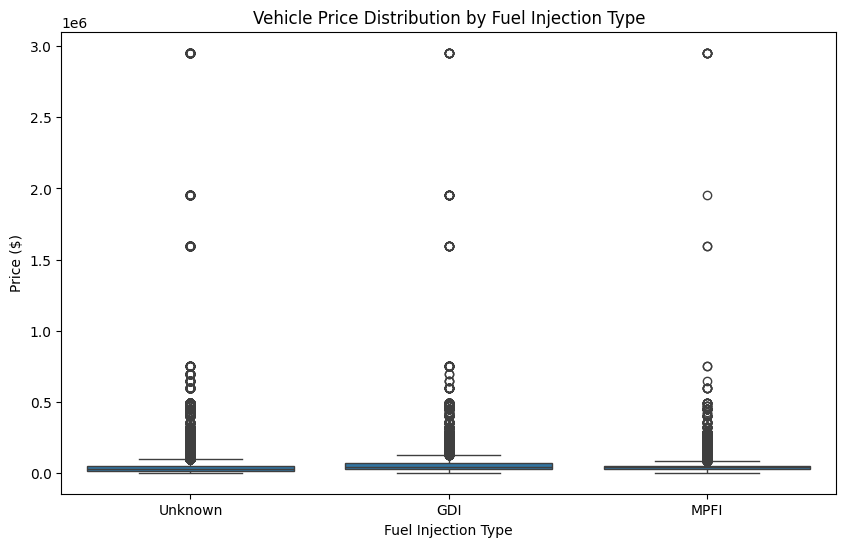

In [76]:

# Plot a box plot to show the distribution of prices by fuel injection type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_injection', y='price', data=df_train)
# Customize the plot
plt.xlabel('Fuel Injection Type')
plt.ylabel('Price ($)')
plt.title('Vehicle Price Distribution by Fuel Injection Type')
plt.show()

In [77]:
show_statistic_details(df_train, 'fuel_injection')
# The error is quite large since the number of count is so small

GDI: Mean = 72732.61, Std Dev = 124608.72 (171.32%) (14010)
MPFI: Mean = 60498.30, Std Dev = 129186.98 (213.54%) (4582)
Unknown: Mean = 41051.11, Std Dev = 71261.68 (173.59%) (169941)


### `valve_count`: Valve Count

In [78]:
# Function to extract valve count
def extract_valve_count(engine):
    match = re.search(r'(\d+)V', engine)
    return int(match.group(1)) if match else None


In [79]:
df_train['valve_count'] = df_train['engine'].apply(extract_valve_count)



In [80]:
Counter(df_train['valve_count']) 

Counter({16.0: 9745,
         24.0: 9196,
         32.0: 3252,
         48.0: 542,
         40.0: 389,
         12.0: 258,
         64.0: 20,
         18.0: 8,
         697.0: 8,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
     

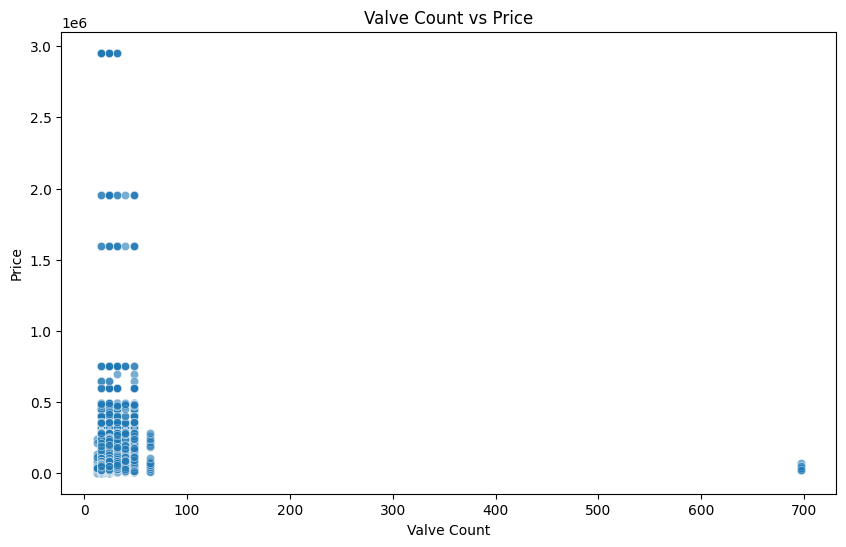

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valve_count', y='price', data=df_train, alpha=0.6)
plt.title('Valve Count vs Price')
plt.xlabel('Valve Count')
plt.ylabel('Price')
plt.show()
# Some 

### `cylinders`: Cylinder Count

In [82]:
def extract_cylinders(engine):
    match = re.search(r'(\d+)\sCylinder', engine)
    return int(match.group(1)) if match else None


In [83]:
df_train['cylinders'] = df_train['engine'].apply(extract_cylinders)


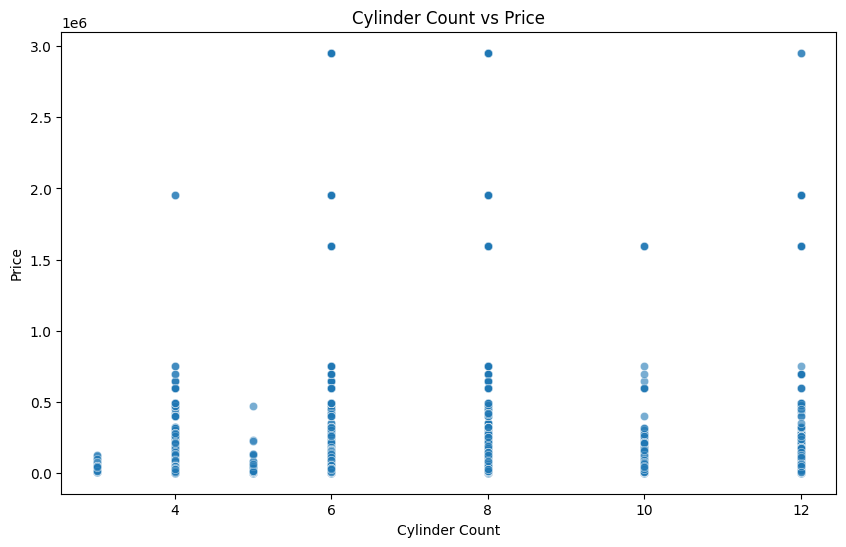

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cylinders', y='price', data=df_train, alpha=0.6)
sns.scatterplot(x='cylinders', y='price', data=df_train, alpha=0.6)
plt.title('Cylinder Count vs Price')
plt.xlabel('Cylinder Count')
plt.ylabel('Price')
plt.show()
# Some 

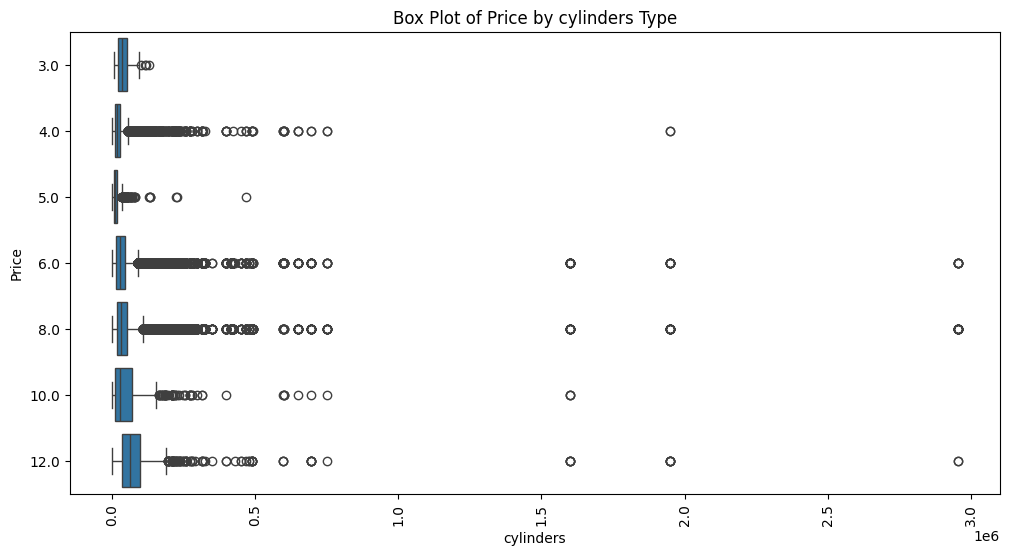

In [232]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='cylinders', data=df_train,orient='h')
plt.title('Box Plot of Price by cylinders Type')
plt.xlabel('cylinders')
plt.ylabel('Price')
plt.xticks(rotation=90) 
plt.show()

###  `displacement`: Engine Displacement

In [203]:
def extract_displacement(engine):
    # Check for Electric Motor
    if "Electric Motor" in engine or "Electric Fuel System" in engine or "Electric" == engine or "Battery"  in engine  or "Dual Motor" == engine:
        return 0.0
    
    # Extract displacement for internal combustion engines
    match = re.search(r'(\d+\.\d+)\s*(L|liter|Litter)', engine, re.IGNORECASE)
    if match:
        return float(match.group(1))
    
    return None

In [204]:
df_train['displacement'] = df_train['engine'].apply(extract_displacement)

In [205]:
# missing values of displacement: 
Counter(df_train.loc[df_train['displacement'].isnull(), 'engine'].values)

Counter({'–': 925,
         'Dual Motor - Standard': 117,
         'V6': 108,
         'I4': 59,
         'V8': 28,
         '12 Cylinder Engine': 8,
         '111.2Ah / FR 70kW / RR 160kW (697V)': 8,
         '120 AH': 4})

In [218]:
df_train_gasoline = df_train.loc[df_train['displacement']!=0.0, :]

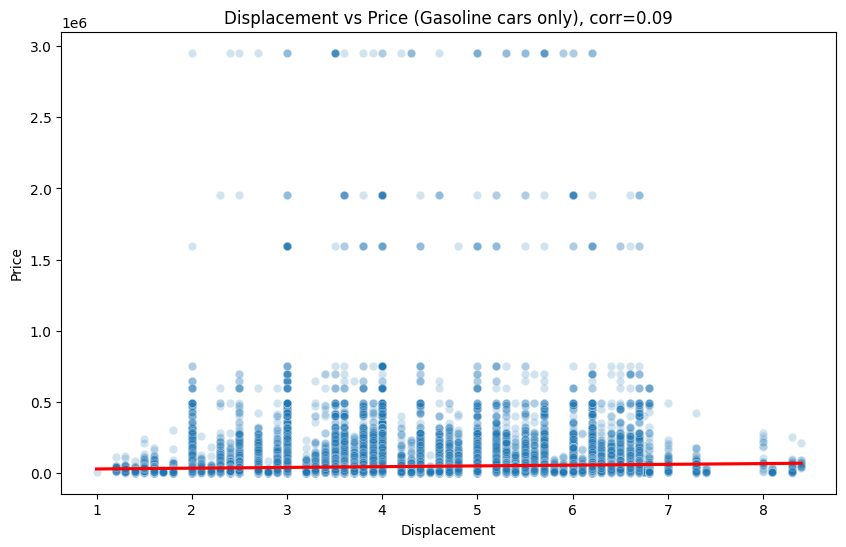

In [229]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displacement', y='price', data=df_train_gasoline, alpha=0.2)
sns.regplot(x='displacement', y='price', data=df_train_gasoline, scatter=False, color='red')
corr=df_train_gasoline[['price', "displacement"]].corr()['displacement']['price']
plt.title(f'Displacement vs Price (Gasoline cars only), corr={corr:.2f}')
plt.xlabel('Displacement')
plt.ylabel('Price')
plt.show()
# Some 

### `horse_power`

In [209]:
# Define functions to extract components from the 'engine' column
def extract_horsepower(engine):
    match = re.search(r'(\d+\.\d+)HP', engine)
    return float(match.group(1)) if match else None


In [210]:
df_train['horse_power'] = df_train['engine'].apply(extract_horsepower)

In [213]:
Counter(df_train.loc[df_train['horse_power'].isnull(), 'engine'])

Counter({'2.0L I4 16V GDI DOHC Turbo': 2680,
         '3.5L V6 24V PDI DOHC Twin Turbo': 1842,
         '5.7L V8 16V MPFI OHV': 1540,
         '4.0L V8 32V GDI DOHC Twin Turbo': 1516,
         '3.6L V6 24V MPFI DOHC': 1480,
         '3.6L V6 24V GDI DOHC': 1224,
         '2.0 Liter Turbo': 1164,
         '5.3L V8 16V GDI OHV': 1011,
         '–': 925,
         '2.5L I4 16V GDI DOHC': 898,
         '3.0 Liter Turbo': 823,
         '3.5L V6 24V PDI DOHC': 814,
         '3.0 Liter': 748,
         '6.2L V8 16V GDI OHV': 728,
         '2.0 Liter': 636,
         '3.0L V6 24V GDI DOHC Twin Turbo': 635,
         '2.0 Liter TFSI': 610,
         '3.5 Liter': 565,
         'Electric': 483,
         '3.8L V6 24V GDI DOHC': 395,
         '4.4 Liter Twin Turbo': 364,
         '4.4L V8 32V GDI DOHC Twin Turbo': 324,
         '2.3L I4 16V GDI DOHC Turbo': 323,
         '3.0L V6 24V GDI DOHC Turbo': 285,
         '4.0L H6 24V GDI DOHC': 277,
         'Electric Motor Electric Fuel System': 269,
        

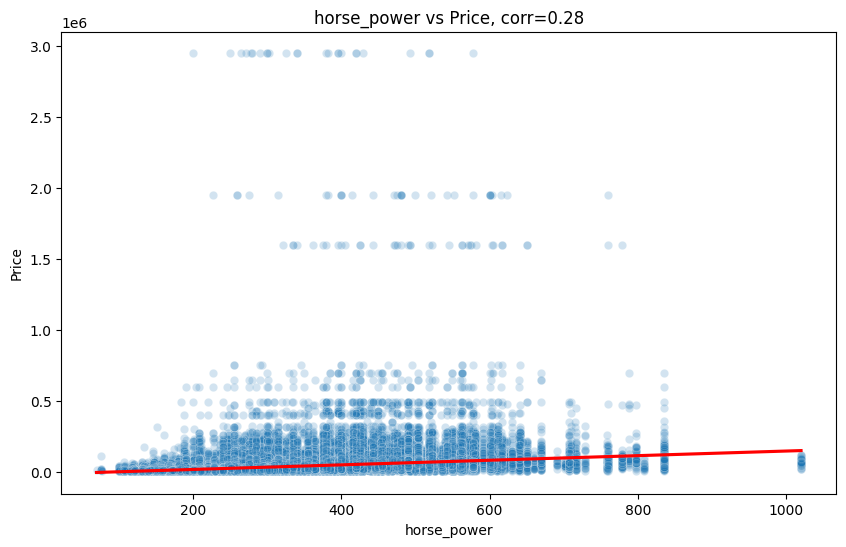

In [231]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horse_power', y='price', data=df_train, alpha=0.2)
sns.regplot(x='horse_power', y='price', data=df_train, scatter=False, color='red')
corr=df_train[['price', "horse_power"]].corr()['horse_power']['price']
plt.title(f'horse_power vs Price, corr={corr:.2f}')
plt.xlabel('horse_power')
plt.ylabel('Price')
plt.show()
# Some 

## Transmission

- Transmission Type: `Automatic`, `Manual`, `CVT`, and others
- Number of Speeds: can significantly impact performance and fuel efficiency, making it a valuable feature to extract.

In [93]:
set(df_train['transmission'])

{'1-Speed A/T',
 '1-Speed Automatic',
 '10-Speed A/T',
 '10-Speed Automatic',
 '10-Speed Automatic with Overdrive',
 '2',
 '2-Speed A/T',
 '2-Speed Automatic',
 '4-Speed A/T',
 '4-Speed Automatic',
 '5-Speed A/T',
 '5-Speed Automatic',
 '5-Speed M/T',
 '6 Speed At/Mt',
 '6 Speed Mt',
 '6-Speed',
 '6-Speed A/T',
 '6-Speed Automatic',
 '6-Speed Automatic with Auto-Shift',
 '6-Speed Electronically Controlled Automatic with O',
 '6-Speed M/T',
 '6-Speed Manual',
 '7-Speed',
 '7-Speed A/T',
 '7-Speed Automatic',
 '7-Speed Automatic with Auto-Shift',
 '7-Speed DCT Automatic',
 '7-Speed M/T',
 '7-Speed Manual',
 '8-SPEED A/T',
 '8-SPEED AT',
 '8-Speed A/T',
 '8-Speed Automatic',
 '8-Speed Automatic with Auto-Shift',
 '8-Speed Manual',
 '9-Speed A/T',
 '9-Speed Automatic',
 '9-Speed Automatic with Auto-Shift',
 'A/T',
 'Automatic',
 'Automatic CVT',
 'CVT Transmission',
 'CVT-F',
 'F',
 'M/T',
 'Manual',
 'SCHEDULED FOR OR IN PRODUCTION',
 'Single-Speed Fixed Gear',
 'Transmission Overdrive Sw

In [94]:
# Define function to extract transmission type
def extract_transmission_type(transmission):
    if 'Automatic' in transmission or 'A/T' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission or 'M/T' in transmission:
        return 'Manual'
    elif 'CVT' in transmission:
        return 'CVT'
    elif 'Speed' in transmission:
        return 'Other'
    else:
        return 'Unknown'

# Define function to extract number of speeds
def extract_number_of_speeds(transmission):
    match = re.search(r'(\d+)-Speed', transmission, re.IGNORECASE)
    return int(match.group(1)) if match else None

In [95]:
# Create new columns in the DataFrame for transmission type and number of speeds
df_train['transmission_type'] = df_train['transmission'].apply(extract_transmission_type)
df_train['number_of_speeds'] = df_train['transmission'].apply(extract_number_of_speeds)


In [96]:
df_train['transmission_type']

0         Automatic
1         Automatic
2         Automatic
3           Unknown
4         Automatic
            ...    
188528      Unknown
188529    Automatic
188530    Automatic
188531    Automatic
188532      Unknown
Name: transmission_type, Length: 188533, dtype: object

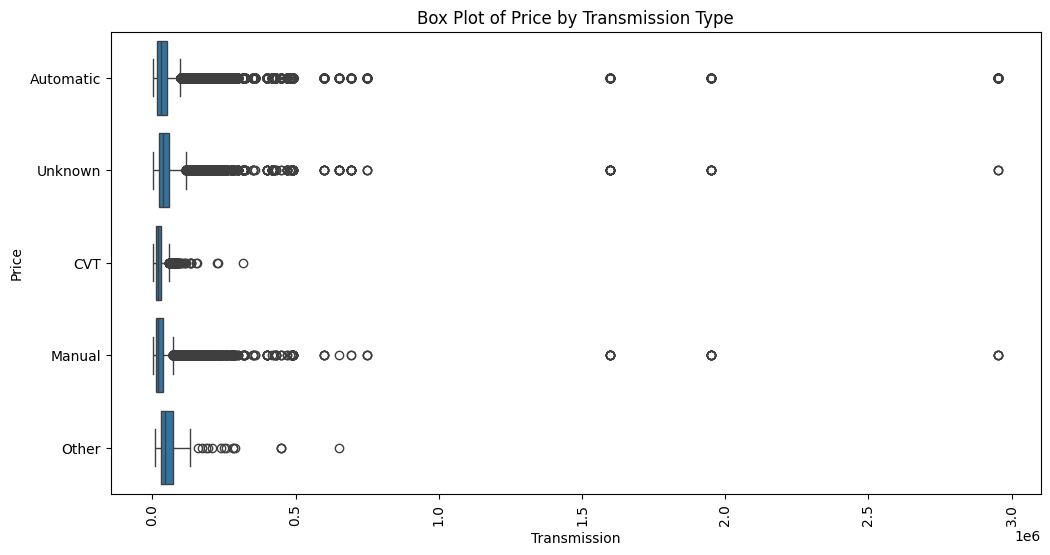

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='transmission_type', data=df_train,orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=90) 
plt.show()

In [98]:
show_statistic_details(df_train, "transmission_type")

Other: Mean = 75507.32, Std Dev = 97076.26 (128.57%) (129)
Unknown: Mean = 50488.42, Std Dev = 83517.57 (165.42%) (19739)
Automatic: Mean = 44322.46, Std Dev = 78124.95 (176.26%) (150302)
Manual: Mean = 33805.31, Std Dev = 82346.06 (243.59%) (16358)
CVT: Mean = 25626.62, Std Dev = 19331.51 (75.44%) (2005)


In [99]:
df_train['number_of_speeds'] 

0         NaN
1         NaN
2         NaN
3         NaN
4         7.0
         ... 
188528    NaN
188529    8.0
188530    7.0
188531    1.0
188532    NaN
Name: number_of_speeds, Length: 188533, dtype: float64

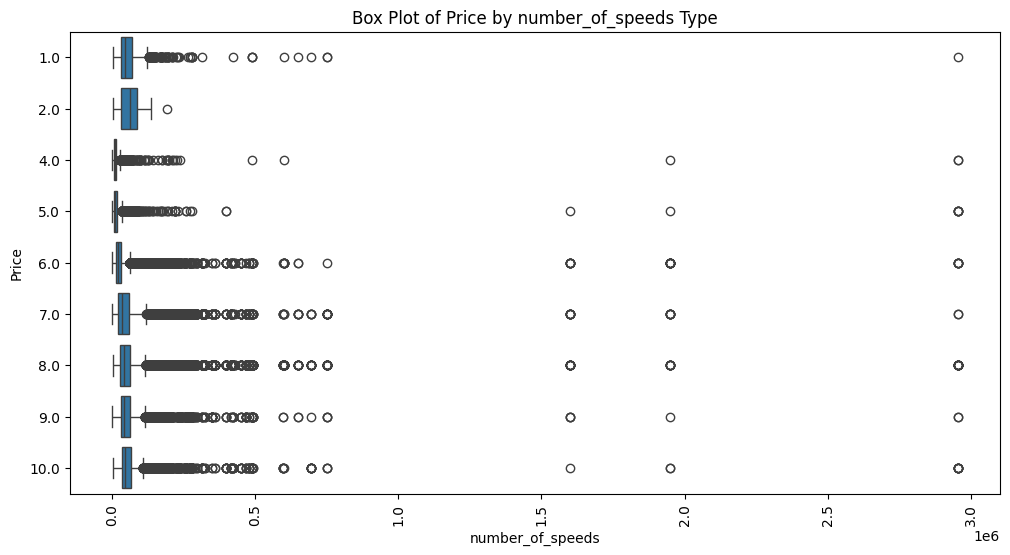

In [100]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='number_of_speeds', y='price', data=df_train)
# plt.title('number_of_speeds')
# plt.xlabel('number_of_speeds')
# plt.ylabel('Price')
# plt.show()
# # Some 
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='number_of_speeds', data=df_train,orient='h')
plt.title('Box Plot of Price by number_of_speeds Type')
plt.xlabel('number_of_speeds')
plt.ylabel('Price')
plt.xticks(rotation=90) 
plt.show()

In [101]:
show_statistic_details(df_train, 'number_of_speeds')

2.0: Mean = 61768.27, Std Dev = 36127.47 (58.49%) (93)
8.0: Mean = 61590.90, Std Dev = 100149.37 (162.60%) (29673)
9.0: Mean = 61275.43, Std Dev = 88838.78 (144.98%) (6224)
10.0: Mean = 60297.69, Std Dev = 91700.72 (152.08%) (11248)
1.0: Mean = 59785.57, Std Dev = 78588.09 (131.45%) (2234)
7.0: Mean = 56740.13, Std Dev = 93760.25 (165.25%) (13027)
6.0: Mean = 30282.72, Std Dev = 65943.84 (217.76%) (33221)
5.0: Mean = 19975.53, Std Dev = 94346.32 (472.31%) (5785)
4.0: Mean = 18281.54, Std Dev = 93226.71 (509.95%) (2594)


## Accident

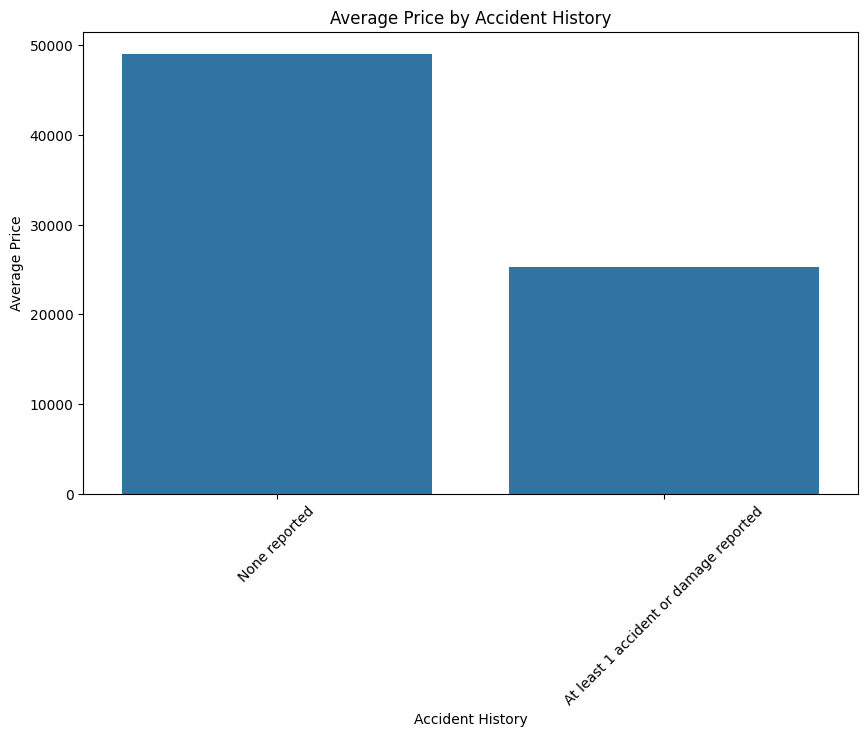

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_train, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [103]:
show_statistic_details(df_train, 'accident')

None reported: Mean = 49024.80, Std Dev = 84593.01 (172.55%) (144514)
At least 1 accident or damage reported: Mean = 25334.07, Std Dev = 47378.62 (187.02%) (41567)


## clean_title

In [104]:
df_train['clean_title']

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
188528    Yes
188529    Yes
188530    Yes
188531    NaN
188532    Yes
Name: clean_title, Length: 188533, dtype: object

# Missing datas

/var/folders/95/q1p_lrjj0ws6gc5nvn1dy_mh0000gn/T/ipykernel_97017/2820431998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


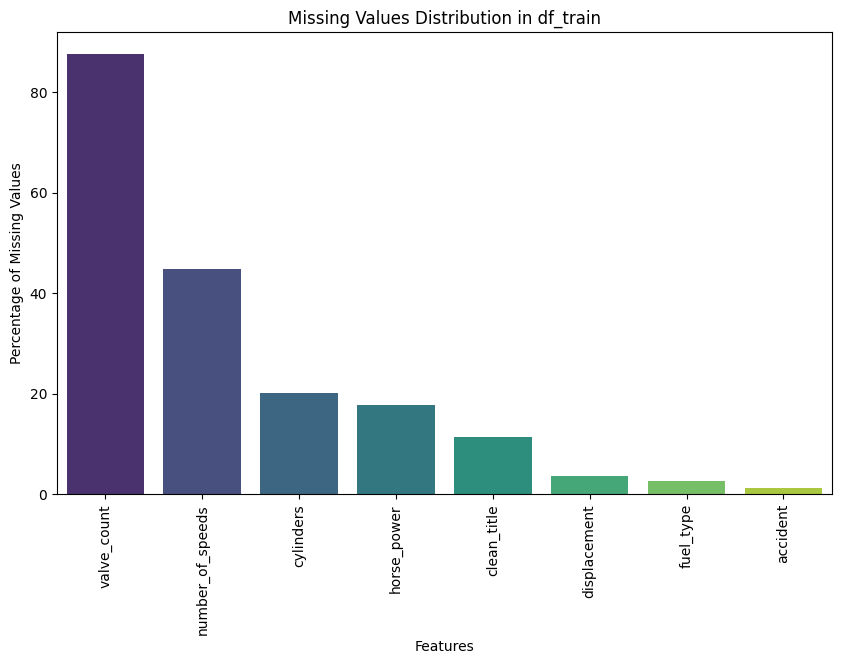

In [105]:
missing_values = df_train.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()
# Some of the missing values come from engines

In [166]:
# Count the number of NaN values for each column (%)
nan_percentage = df_train.isnull().mean() * 100
print(nan_percentage)

id                    0.000000
brand                 0.000000
model                 0.000000
model_year            0.000000
milage                0.000000
fuel_type             2.696080
engine                0.000000
transmission          0.000000
ext_col               0.000000
int_col               0.000000
accident              1.300568
clean_title          11.360876
price                 0.000000
fuel_injection        0.000000
valve_count          87.578832
cylinders            20.078713
displacement          3.552694
horse_power          17.640943
transmission_type     0.000000
number_of_speeds     44.784733
dtype: float64


# Check the Associations